<a href="https://colab.research.google.com/github/Tanjul5/Netflix-Movies-and-TV-shows-Clustering/blob/main/Netflix_Movies_and_TV_shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, 

you are required to do Exploratory Data Analysis

Understanding what type content is available in different countries

Is Netflix has increasingly focusing on TV rather than movies in recent years.

Clustering similar content by matching text-based features

**Attribute Information**

show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genere

description: The Summary description

# **Importing Libraries**

In [2]:
#Importing the libraries
import pandas as pd                 #Extensively used to load and wrangle with the dataset.
import numpy as np                  #For some math operations in predictions
import matplotlib.pyplot as plt     #Used for visualization.
import seaborn as sns               #Used for visualization.
import missingno as mno             #install  pip install missingno
import warnings                     #For filtering and ignoring the warnings.
warnings.filterwarnings('ignore')
from datetime import date,datetime  #Used for analysing the date variable

In [3]:
#importing and connecting to the drive storage
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#loading the dataset
netflix= pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [5]:
# Making two copies of the dataset

# df1 is used in preprocessing of clustring
df1=netflix.copy()

# df2 is used to check the predicted output
df2=netflix.copy()

In [6]:
# first 5 values
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [7]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
#shape and size of dataset
netflix.shape

(7787, 12)

In [9]:
#columns in the dataset
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
# Find the various statistic for all the columns
netflix.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


# **Data Wrangling**

In [11]:
def missing_pct(netflix):
    # Calculate missing value and their percentage for each column
    missing_count_percent = netflix.isnull().sum() * 100 / netflix.shape[0]
    df_missing_count_percent = pd.DataFrame(missing_count_percent).round(2)
    df_missing_count_percent = df_missing_count_percent.reset_index().rename(
                    columns={
                            'index':'Column',
                            0:'Missing_Percentage (%)'
                    }
                )
    df_missing_value = netflix.isnull().sum()
    df_missing_value = df_missing_value.reset_index().rename(
                    columns={
                            'index':'Column',
                            0:'Missing_value_count'
                    }
                )
    # Sort the data frame
    #df_missing = df_missing.sort_values('Missing_Percentage (%)', ascending=False)
    Final = df_missing_value.merge(df_missing_count_percent, how = 'inner', left_on = 'Column', right_on = 'Column')
    Final = Final.sort_values(by = 'Missing_Percentage (%)',ascending = False)
    return Final

missing_pct(netflix)

,Column,Missing_value_count,Missing_Percentage (%)
3,director,2389,30.68
4,cast,718,9.22
5,country,507,6.51
6,date_added,10,0.13
8,rating,7,0.09
0,show_id,0,0.00
1,type,0,0.00
2,title,0,0.00
7,release_year,0,0.00
9,duration,0,0.00


# **Observations:**

The director column has 30% null values, which is a significantly large proportion. In our analysis, these null values cause certain problems. This is always circumstance dependent, however in this case:

We will need to replace blank countries with the mode (most common) country.

It would be better to keep director because it can be fascinating to look at a specific filmmaker's movie. As a result, we substitute the null values with the word 'unknown' for further analysis.

It would be better to keep the cast because it can be fascinating to look at the films of a specific cast. As a result, we substitute the null values with the word 'unknown' for further analysis.

This bar chart gives you an idea about how many missing values are there in each column. "director" has the most missing value followed by "cast" and "country". There are few missing value in "date_added" and "rating".

In [12]:
# Replacing the null values in director column
netflix['director'].replace(np.nan, 'No Data',inplace  = True)

# Replacing the null values in cast column
netflix['cast'].replace(np.nan, 'No Data',inplace  = True)

# Replacing the null values in country column
netflix['country'] = netflix['country'].fillna(netflix['country'].mode()[0])

# Replacing the null values in country column
netflix['rating'] = netflix['rating'].fillna(netflix['rating'].mode()[0])

There are very few null entries in the date_added fields and there is no logical way to handling the dates, thus deleting them is a better alternative..

In [13]:
# Dropping the null values of the date_added column
netflix.dropna(inplace=True)

In [14]:
#checking the null values are replaced or not
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [15]:
netflix.duplicated().sum()

0

Dataset has no duplicate values

# **feature engnineering**

**1. Creating new columns**

In [16]:
#Adding a year Column from date_added Column
netflix['year_added'] = netflix['date_added'].apply(lambda x: x.split(" ")[-1])


#Adding a Month Column from date_added column
netflix['month_added'] = netflix['date_added'].apply(lambda x: x.split(" ")[0])

netflix['date_added']=pd.to_datetime(netflix["date_added"].str.strip(), format="%B %d, %Y")

In [17]:
#Assigning the Ratings into grouped categories
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

netflix['target_ages'] = netflix['rating'].replace(ratings_ages)
netflix['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [18]:
netflix.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages
0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Adults


In [19]:
netflix['date'] = pd.to_datetime(netflix['date_added'])
netflix['Year'] = netflix['date'].dt.year
netflix['Month'] = netflix['date'].dt.month
netflix['Day'] = netflix['date'].dt.day
netflix['Year'].astype(int);
netflix['Day'].astype(int);

# Droping the month_added columns
netflix.drop(['date_added'],axis=1,inplace=True)

In [20]:
netflix.head(2)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,date,Year,Month,Day
0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Adults,2020-08-14,2020,8,14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Adults,2016-12-23,2016,12,23


**Exploratory Data Analysis(EDA)**

**WHAT TYPE OF CONTENT IS PRESENT IN NETFLIX?**

In [21]:
netflix['type'].value_counts().sort_values()

TV Show    2400
Movie      5377
Name: type, dtype: int64

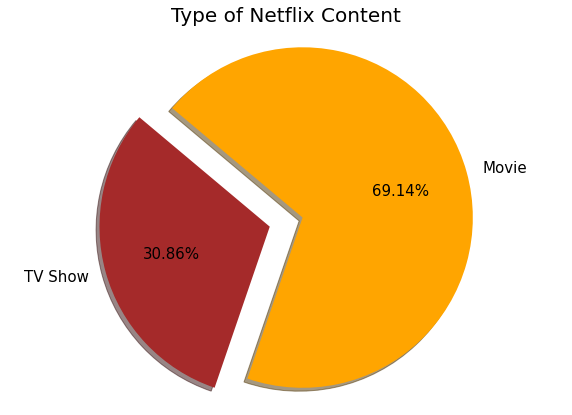

In [22]:
#Checking the distribution of type of Content in the dataset
plt.figure(figsize=(10, 7))
labels=['TV Show', 'Movie']
textprops = {"fontsize":15}
plt.pie(netflix['type'].value_counts().sort_values(),labels=labels,autopct='%1.2f%%',explode=[0.1,0.1],
        colors=['brown','orange'], startangle=140, shadow = True, textprops=textprops)
plt.title('Type of Netflix Content',fontsize=20)
plt.axis('equal')
plt.show()

**Let's check movie ratings**

In [23]:
def generate_rating_df(netflix):
    rating_df = netflix.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['show_id'] != 0]
    rating_df.columns = ['rating', 'target_ages', 'counts']
    rating_df = rating_df.sort_values('target_ages')
    return rating_df

In [24]:
import plotly.express as px
rating_df = generate_rating_df(netflix)
fig = px.bar(rating_df, x='rating', y='counts', color='target_ages', title='Ratings of Movies And TV Shows Based On Target Age Groups',  labels={'counts':'COUNT', 'rating':'RATINGS', 'target_ages':'TARGET AGE GROUPS' })
fig.show()

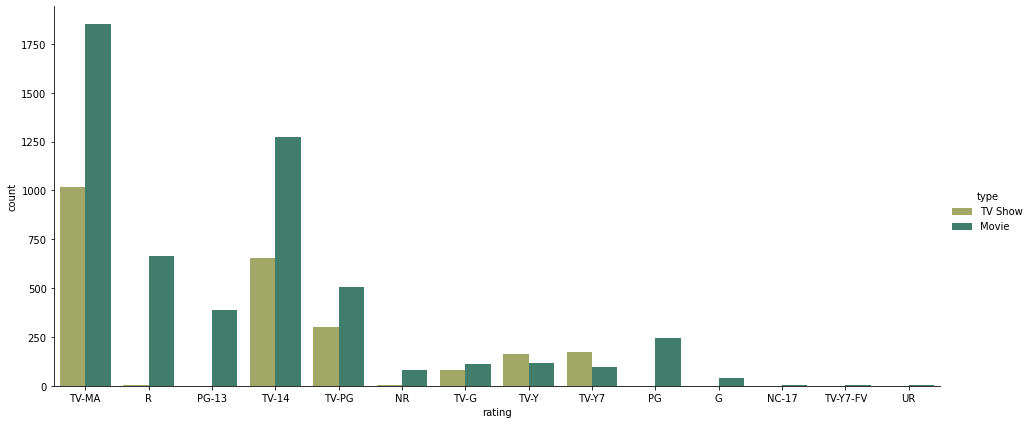

In [25]:
#Plotting the same on a comparison plot
from IPython.core.pylabtools import figsize
g = sns.catplot(x="rating", hue='type',
                data=netflix, kind="count",
height=6, aspect=11.7/5.27, palette="gist_earth_r");

*Most number of movies and TV Shows rated TV-MA i.e. Adult Rating*

**Observations:**

The 'TV-MA' rating is used in the majority of the film. The TV Parental Guidelines provide a "TV-MA" classification to a television programme that is intended solely for mature audiences.

The second largest is 'TV-14,' which stands for content that may be inappropriate for minors under the age of 14.

*The third most common is the extremely popular 'R' rating. The Motion Picture Association of America defines an R-rated film as one that contains material that may be inappropriate for children under the age of 17; the MPAA states that "Under 17 requires accompanying parent or adult guardian." *

**Now understanding what type content is available in different countries?**

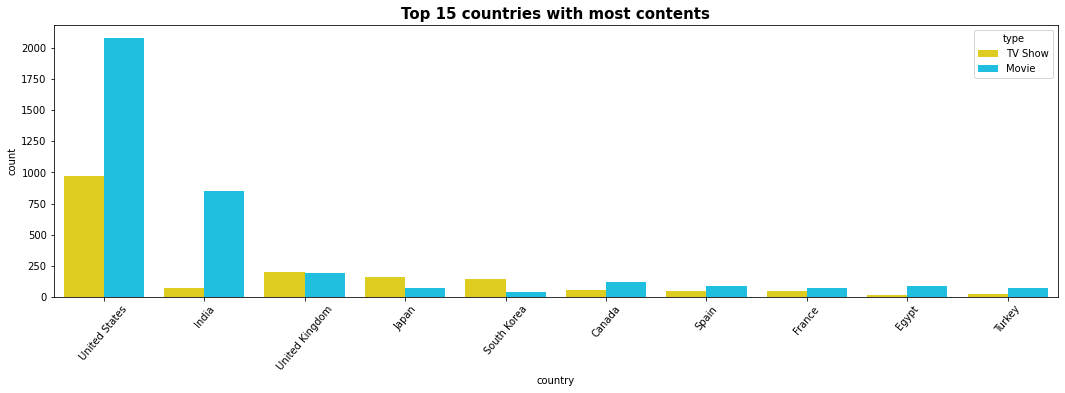

In [26]:
#Analysing top15 countries with most content 
plt.figure(figsize=(18,5))
sns.countplot(x=netflix['country'],palette="jet_r",order=netflix['country'].value_counts().index[0:10],hue=netflix['type'])
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

**Observations:**

The majority of the content on Netflix in India is comprised of movies.

Bollywood is a significant business, and movies, rather than TV shows, may be the industry's major focus.

South Korean Netflix on the other hand is almost entirely TV Shows.

The fundamental reason for the variation in content must be due to market research undertaken by Netflix

**Let's check which type of viewer present in top 10 country?**

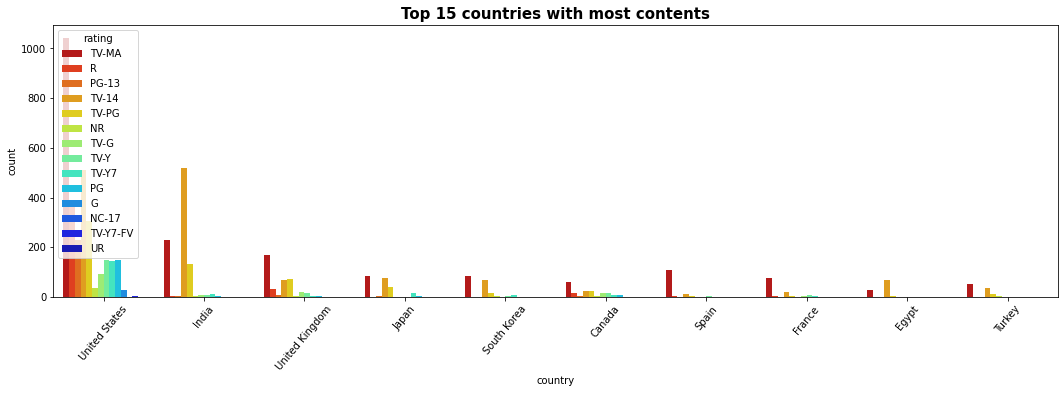

In [27]:
#Analysing top10 countries with most content 
plt.figure(figsize=(18,5))
sns.countplot(x=netflix['country'],palette="jet_r",order=netflix['country'].value_counts().index[0:10],hue=netflix['rating'])
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

As we can see from the plot above, there are various types of content available, but in most countries, TV-MA content is available, and the TV-MA rating you see on many Netflix TV series signifies that the programme is only suitable for mature viewers. A TV show with a TV-MA rating features graphic violence or a combination of brutal violence. So that could be the reason for it, because the Netflix audience enjoys this type of content.

In [28]:
#Define displayed years:
years= list(range(2005,2021,1))

#separate movies and tv_shows:
movie_rows = netflix.loc[netflix["type"] == "Movie"]
tv_rows = netflix.loc[netflix["type"] == "TV Show"]

#Count movies / tv shows per year
movies_counts = movie_rows.release_year.value_counts()
tv_counts = tv_rows.release_year.value_counts()

index_years_mov = movies_counts.index.isin(years)
index_years_tv = tv_counts.index.isin(years)

#select movies / tv shows between chosen years:
movies = movies_counts[index_years_mov]
tv_shows = tv_counts[index_years_tv]

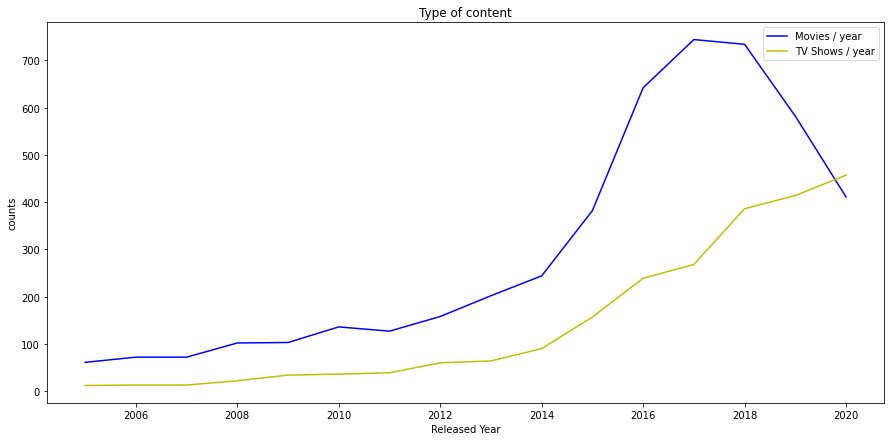

In [29]:
# Set up the matplotlib figure
plt.subplots(figsize=(15,7), sharex=False) 
plt.xlabel("Released Year")
plt.ylabel("counts")
plt.title("Type of content")      
#Line plot of Movies and TV Shows released by Netflix per year")
sns.lineplot(data=movies, color="b", label="Movies / year")
sns.lineplot(data=tv_shows,color="y",  label="TV Shows / year")

*It seems like Netflix focused on movies, and the movie count increases significantly till 2018. There's been a decline in the movies count but a steady growth in the TV shows since 2018.*

Text(0.5, 0, 'Release Year')

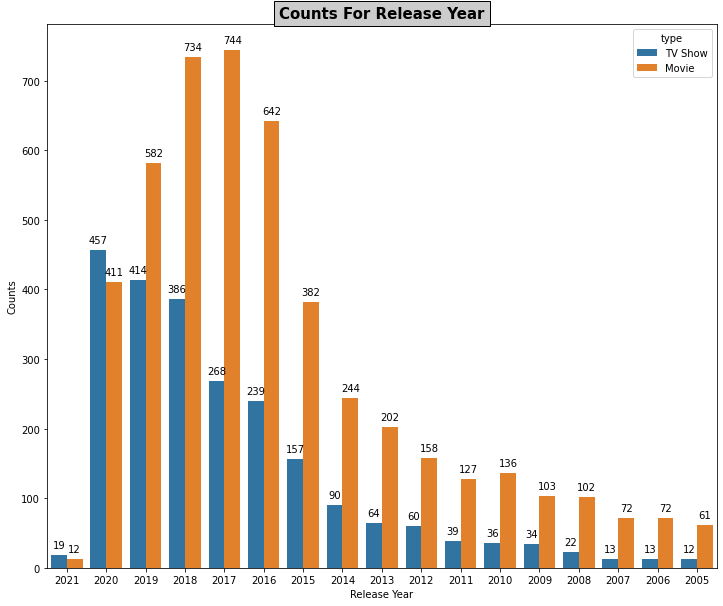

In [30]:
# Plotting the Countplot 
plt.figure(figsize=(12,10))
ax=sns.countplot('release_year',data=netflix,hue='type',
              order=[2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
                     ,2009,2008,2007,2006,2005])
# We take only those year under consideration, onwards which netflix starts streaming services.

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Counts For Release Year",fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5})
plt.ylabel('Counts')
plt.xlabel('Release Year')

*According to the following countplot, 774 movies were released in 2017, which is the most number of releases in any year.*

*According to the above countplot, there will be 457 television shows released in 2020, which is the most of any year. *

Text(0.5, 0, 'Release Year')

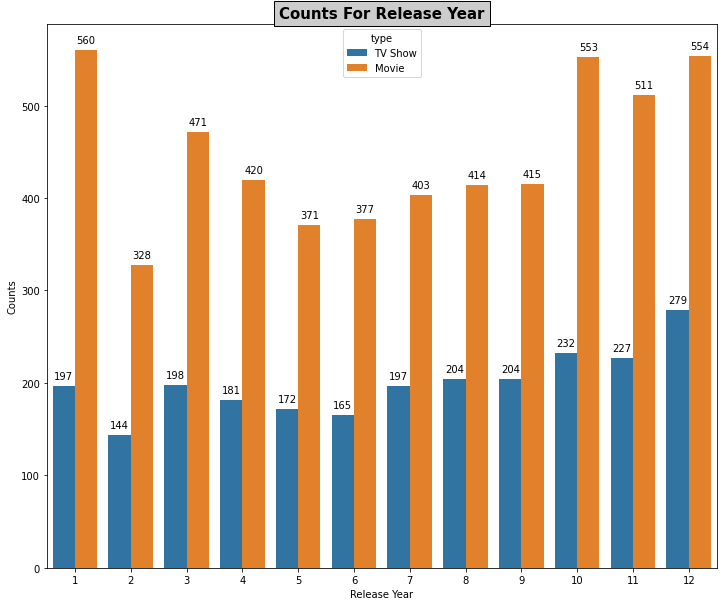

In [31]:
# Plotting the Countplot 
plt.figure(figsize=(12,10))
ax=sns.countplot('Month',data=netflix,hue='type',
              order=[1,2,3,4,5,6,7,8,9,10,11,12])
# We take only those year under consideration, onwards which netflix starts streaming services.

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height())
  , ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title("Counts For Release Year",fontsize=15,fontweight='bold',
          bbox={'facecolor':'0.8', 'pad':5})
plt.ylabel('Counts')
plt.xlabel('Release Year')

The number of movies on Netflix is growing significantly faster than the number of TV shows.

In both 2018 and 2019, approximately 1200 new movies were added.

We saw a huge increase in the number of movies and television episodes after 2014.

Because of covid-19, there is a significant drop in the number of movies and television episodes produced after 2019.

It appears that Netflix has focused more attention on increasing Movie content that TV Shows. Movies have increased much more dramatically than TV shows.

The above graph shows that the most content is added to Netflix in December.

In February, Netflix adds extremely few new movies and television episodes.

In [32]:
netflix.head(2)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,date,Year,Month,Day
0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Adults,2020-08-14,2020,8,14
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Adults,2016-12-23,2016,12,23


In [33]:
# Importing the Counter
from collections import Counter

# Counting the genres for the movies
genres=list(netflix['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

In [34]:
g

Counter({'Action&Adventure': 721,
         'AnimeFeatures': 57,
         'AnimeSeries': 147,
         'BritishTVShows': 231,
         'Children&FamilyMovies': 532,
         'Classic&CultTV': 25,
         'ClassicMovies': 103,
         'Comedies': 1471,
         'CrimeTVShows': 426,
         'CultMovies': 59,
         'Documentaries': 786,
         'Docuseries': 352,
         'Dramas': 2106,
         'Faith&Spirituality': 57,
         'HorrorMovies': 312,
         'IndependentMovies': 673,
         'InternationalMovies': 2437,
         'InternationalTVShows': 1198,
         "Kids'TV": 412,
         'KoreanTVShows': 150,
         'LGBTQMovies': 90,
         'Movies': 56,
         'Music&Musicals': 321,
         'RealityTV': 222,
         'RomanticMovies': 531,
         'RomanticTVShows': 333,
         'Sci-Fi&Fantasy': 218,
         'Science&NatureTV': 85,
         'Spanish-LanguageTVShows': 146,
         'SportsMovies': 196,
         'Stand-UpComedy': 329,
         'Stand-UpComedy&TalkS

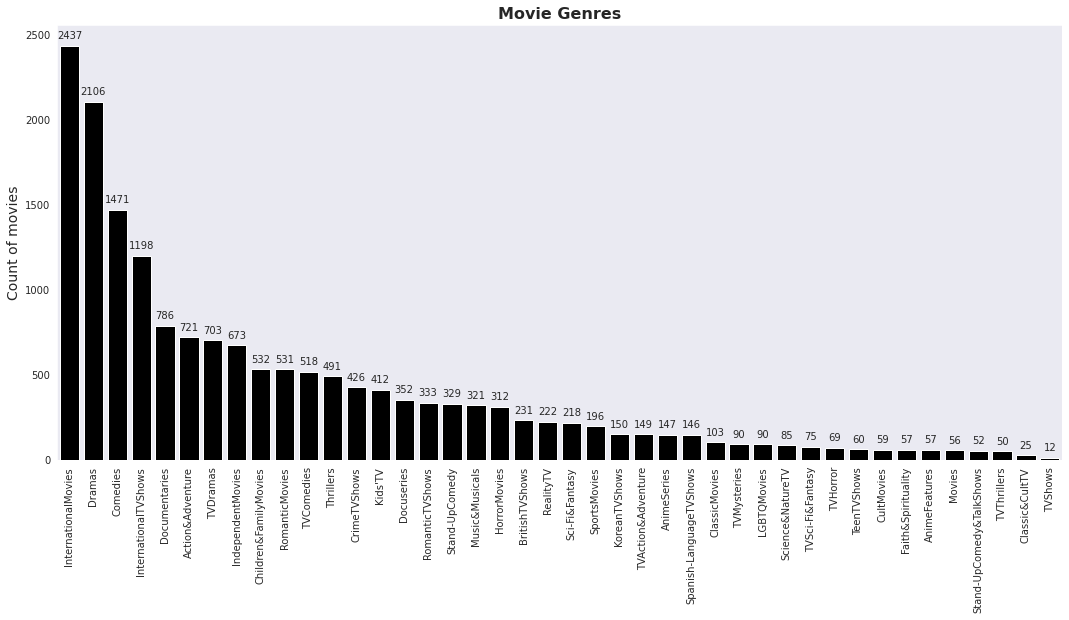

In [35]:
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}

# Plotting the graoh
sns.set_style('dark')
plt.figure(figsize = (18, 8))
x=list(g.keys())
y=list(g.values())
ax=sns.barplot(x,y, color='black')

# set a title
plt.title("Movie Genres", fontsize=16, fontweight='bold')
plt.xticks(rotation = 90)
plt.ylabel("Count of movies",fontsize=14)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()) , ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points')

In [36]:
Listed_in= netflix['listed_in'].value_counts().reset_index()
Listed_in.rename(columns={'index' : 'Listed_in'}, inplace= True)
Listed_in.rename(columns={'listed_in' : 'count'}, inplace= True)
Listed_in.head()

,Listed_in,count
0,Documentaries,334
1,Stand-Up Comedy,321
2,"Dramas, International Movies",320
3,"Comedies, Dramas, International Movies",243
4,"Dramas, Independent Movies, International Movies",215


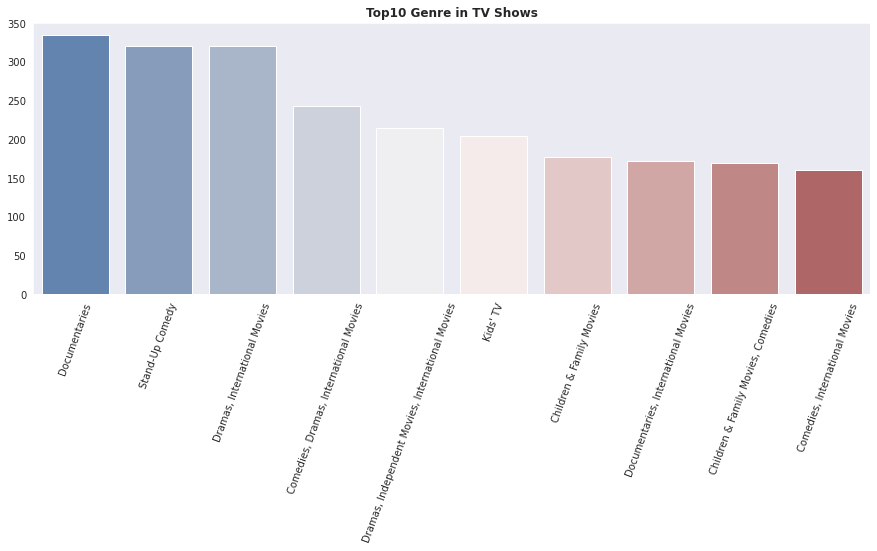

In [37]:
# Top 10 genres without using the Counter
plt.figure(figsize=(15,5))
sns.barplot(x = netflix["listed_in"].value_counts().head(10).index,
            y = netflix["listed_in"].value_counts().head(10).values,palette="vlag")
plt.xticks(rotation=70)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

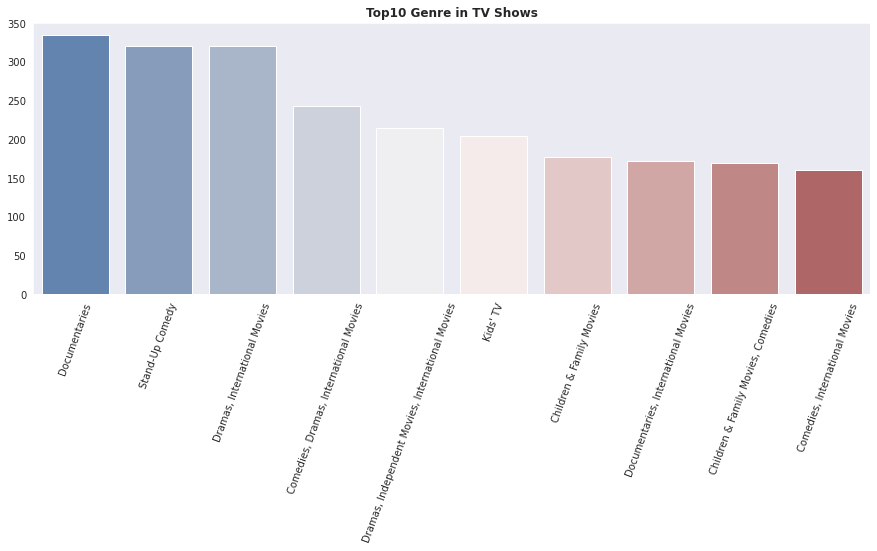

In [38]:
# Top 10 genres without using the Counter
plt.figure(figsize=(15,5))
sns.barplot(x = netflix["listed_in"].value_counts().head(10).index,
            y = netflix["listed_in"].value_counts().head(10).values,palette="vlag")
plt.xticks(rotation=70)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()

**Top 10 Director who appear in the majority of films**

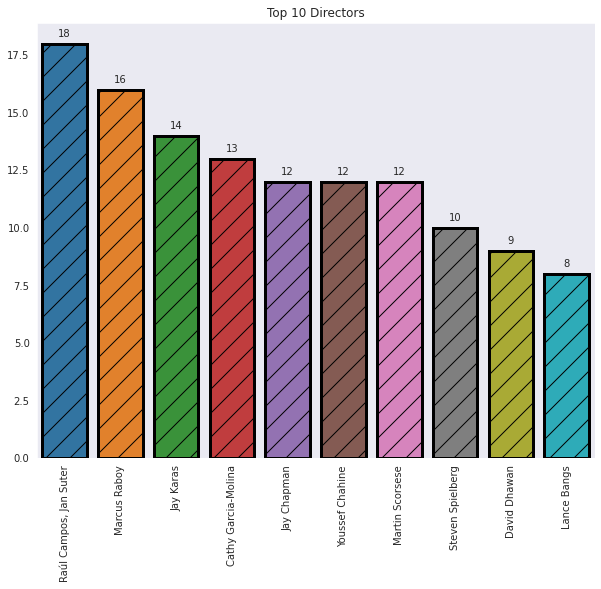

In [39]:
# Top 10 most Productive Movie Directors
plt.figure(figsize=(10,8))
x=netflix['director'].value_counts().index[1:11]
y=netflix['director'].value_counts().values[1:11]
ax=sns.barplot(x,y,lw=3, ec='black' , hatch='/')
plt.title('Top 10 Directors')
plt.xticks(rotation = 90, fontsize=10)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()) , ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points')

The Directors who produce the most material are Raul Campos and Jan Sutler. They work in 18 movies as a director.

David Dhawan is ranked second among top directors, having directed 15 films.

**Top 10 Actors who appear in the majority of films**

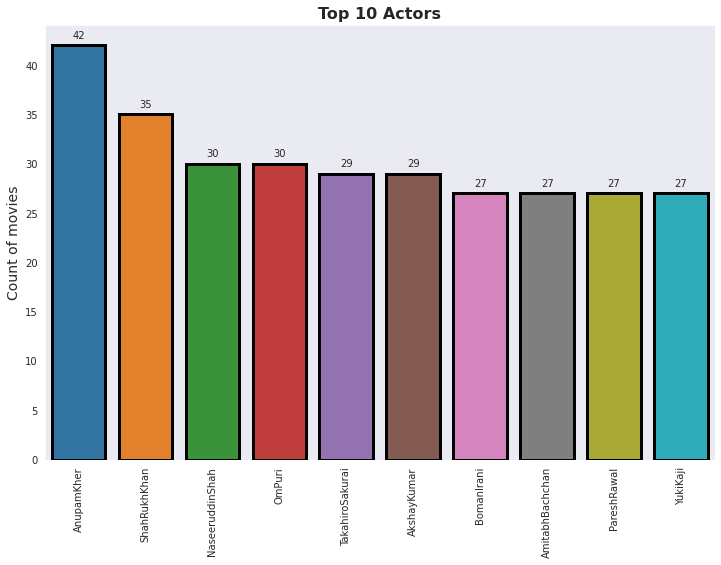

In [40]:
# Importing the Counter
from collections import Counter

# Counting the Actors for the movies
actors=list(netflix['cast'])
cast=[]

for i in actors:
    i=list(i.split(','))
    for j in i:
        cast.append(j.replace(' ',""))
movie_cast=Counter(cast)


movie_cast={k: v for k, v in sorted(movie_cast.items(), key=lambda item: item[1], reverse= True)}

# Plotting the graoh
sns.set_style('dark')
plt.figure(figsize = (12, 8))
x=list(movie_cast.keys())
y=list(movie_cast.values())
ax=sns.barplot(x[1:11],y[1:11],lw=3,ec='black')

# set a title
plt.title("Top 10 Actors", fontsize=16, fontweight='bold')
plt.xticks(rotation = 90)
plt.ylabel("Count of movies",fontsize=14)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()) , ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points')

*According to the above barplot, Anupam Kher has worked in over 40 films.*

*After Anupam Kher, Shahrukh Khan is ranked second, with 35 films under his belt.*

*Naseeruddin Shah and Ompuri have worked in 30 films.*

**Top 10 Actors who appear in the majority of Tv shows**

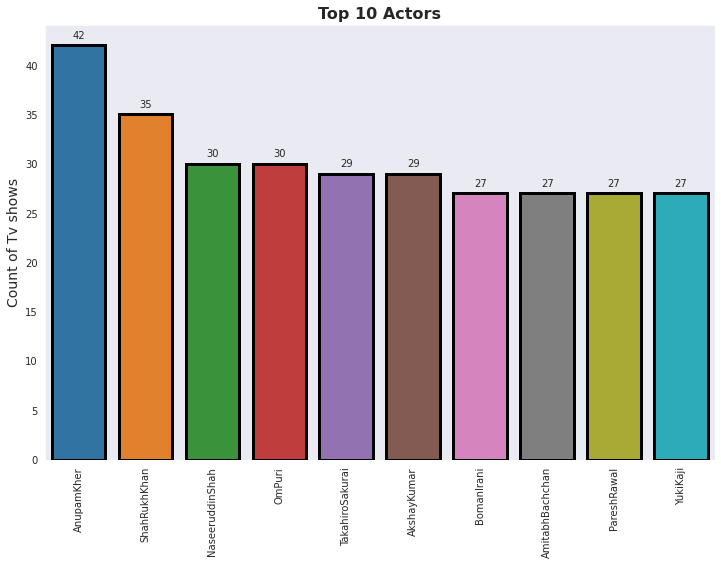

In [41]:
# Importing the Counter
from collections import Counter

# Counting the Actors for the movies
actors=list(netflix['cast'])
cast=[]

for i in actors:
    i=list(i.split(','))
    for j in i:
        cast.append(j.replace(' ',""))
tv_cast=Counter(cast)


tv_cast={k: v for k, v in sorted(tv_cast.items(), key=lambda item: item[1], reverse= True)}

# Plotting the graoh
sns.set_style('dark')
plt.figure(figsize = (12, 8))
x=list(tv_cast.keys())
y=list(tv_cast.values())
ax=sns.barplot(x[1:11],y[1:11],lw=3,ec='black')

# set a title
plt.title("Top 10 Actors", fontsize=16, fontweight='bold')
plt.xticks(rotation = 90)
plt.ylabel("Count of Tv shows",fontsize=14)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()) , ha = 'center', va = 'center', xytext = (0, 10), 
  textcoords = 'offset points')

*According to the above barplot, Takahiro Sakurai has worked in over 20 tv shows.*

*After Takahiro Sakurai, Yuki Kaji is ranked second, with 17 tv shows under his belt.*

*Aikayano and Daisuke Ono have worked in 16 tv shows.*

**TEXT CLEANING AND FEATURE ENGINEERING**

**Encoding the categorical data**

First, we transform column data to a list so that we can do suitable actions in columns. Then we find the unique cast, directors, and genres for these columns.

In [42]:
#dataset copied for clustering
df = netflix.copy()

In [43]:
# Replacing the values where the director is null with appropriate strings
df["director"] = df["director"].fillna("")
df["cast"] = df["cast"].fillna("")
df["country"] = df["country"].fillna("United States")
#df["date_added"] = df["date_added"].fillna("")
df["rating"] = df["rating"].fillna("")

In [44]:
#Taking the primary country into account for each record and not the others
df.country = df.country.str.split(',')
df.loc[:, 'country'] = df.country.map(lambda x: x[0])

In [45]:
#Taking the primary director into account for each record and not the others
df.director = df.director.str.split(',')
df.loc[:, 'director'] = df.director.map(lambda x: x[0])

In [46]:
#Taking the primary cast member into account for each record and not the others
df.cast = df.cast.str.split(',')
df.loc[:, 'cast'] = df.cast.map(lambda x: x[0])

In [47]:
#Combine the above featured for vectorization
df["combined_text_feat"] = df['listed_in'].astype(str) + " " + df['description'].astype(str) + " " + df['type'].astype(str) + " "  + df['country'].astype(str) + " " + df['cast'].astype(str) + " " + df['rating'].astype(str)

**STEMMING**

In [48]:
from nltk.stem import PorterStemmer

import re
import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords

stemmer = PorterStemmer()
# Cleaning the text
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
REMOVE_NUM = re.compile('[\d+]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(inp_str):

    # Lowercase text
    inp_str = inp_str.lower() 

    # Replace REPLACE_BY_SPACE_RE symbols by space in text
    inp_str = REPLACE_BY_SPACE_RE.sub(' ', inp_str) 
    
    # Remove the XXXX values
    inp_str = inp_str.replace('x', '') 
    
    # Remove white space
    inp_str = REMOVE_NUM.sub('', inp_str)

    # Remove symbols which are in BAD_SYMBOLS_RE from text
    inp_str = BAD_SYMBOLS_RE.sub('', inp_str) 

    # Remove stopwords from text
    inp_str = ' '.join(word for word in inp_str.split() if word not in STOPWORDS) 
    
    # Remove any words composed of less than 2 or more than 21 letters
    inp_str = ' '.join(word for word in inp_str.split() if (len(word) >= 2 and len(word) <= 21))

    # Stemming the words
    inp_str = ' '.join([stemmer.stem(word) for word in inp_str.split()])
    
    return inp_str

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [49]:
#applying the clean text funtion to the combined feature column for cleanup
df["combined_text_feat"] = df["combined_text_feat"].apply(clean_text)
df["combined_text_feat"]

0       intern tv show tv drama tv scifi fantasi futur...
1       drama intern movi devast earthquak hit meico c...
2       horror movi intern movi armi recruit found dea...
3       action adventur independ movi scifi fantasi po...
4       drama brilliant group student becom cardcount ...
                              ...                        
7782    drama intern movi lebanon civil war depriv zoz...
7783    drama intern movi music music scrappi poor boy...
7784    documentari intern movi music music documentar...
7785    intern tv show realiti tv dessert wizard adria...
7786    documentari music music documentari delv mysti...
Name: combined_text_feat, Length: 7777, dtype: object

**VECTORIZATION**

**TF-IDF**

In [50]:
# Run TF IDF Vectorizer on the text data
from sklearn.feature_extraction.text import TfidfVectorizer

# sublinear_df is set to True to use a logarithmic form for frequency
# min_df is the minimum numbers of documents a word must be present in to be kept
# norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1
# ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams
# stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features

vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english')
X_vc = vectorizer.fit_transform(df["combined_text_feat"])

pd.DataFrame(X_vc.toarray(), columns=vectorizer.get_feature_names()).head()

,aamir,aamir khan,aaron,abandon,abduct,abil,aboard,abraham,absurd,abus,...,young son,young woman,young women,younger,youth,zach,zani,zealand,zoe,zombi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**TEXT BASED CLUSTERING**

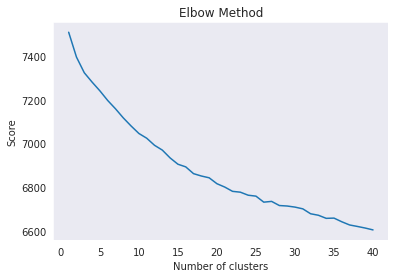

In [51]:
#Performing the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

score = []
for i in range(1,41):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=5,random_state=0)
    kmeans.fit(X_vc)
    score.append(kmeans.inertia_)
plt.plot(range(1,41 ),score)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Score')

plt.show()

In [52]:
#Finding the optimal number of cluster using silhoutte method
from sklearn.metrics import silhouette_score
for n in range(2,41):
    clusterer = KMeans(n_clusters=n)
    preds = clusterer.fit_predict(X_vc)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X_vc, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n, score))

For n_clusters = 2, silhouette score is 0.014696088079553709
For n_clusters = 3, silhouette score is 0.016114325326972368
For n_clusters = 4, silhouette score is 0.016629384038578165
For n_clusters = 5, silhouette score is 0.015150752437943863
For n_clusters = 6, silhouette score is 0.0161073435184553
For n_clusters = 7, silhouette score is 0.019041532524204968
For n_clusters = 8, silhouette score is 0.01873194806434707
For n_clusters = 9, silhouette score is 0.020113612985633713
For n_clusters = 10, silhouette score is 0.022017415257105603
For n_clusters = 11, silhouette score is 0.021723406164949385
For n_clusters = 12, silhouette score is 0.024136913352546786
For n_clusters = 13, silhouette score is 0.02526138717455169
For n_clusters = 14, silhouette score is 0.026475061897783623
For n_clusters = 15, silhouette score is 0.026744466779529536
For n_clusters = 16, silhouette score is 0.026629171068295987
For n_clusters = 17, silhouette score is 0.027624814185655468
For n_clusters = 18,

In [53]:
k_clusters = 35

In [54]:
#Clustering the dataset with the optimal number of clusters
model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=0)
model.fit(X_vc)

KMeans(max_iter=600, n_clusters=35, random_state=0, tol=1e-06)

In [55]:
#Predict the clusters and evaluate the silhouette score
clusters = model.predict(X_vc)
score = silhouette_score(X_vc, clusters)
print("Silhouette score is {}".format(score))

Silhouette score is 0.02664956783630785


In [56]:
#Adding a seperate column for the cluster
df["Cluster Label"] = clusters
df.head(5)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,date,Year,Month,Day,combined_text_feat,Cluster Label
0,s1,TV Show,3%,No Data,João Miguel,Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Adults,2020-08-14,2020,8,14,intern tv show tv drama tv scifi fantasi futur...,13
1,s2,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Adults,2016-12-23,2016,12,23,drama intern movi devast earthquak hit meico c...,34
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,Adults,2018-12-20,2018,12,20,horror movi intern movi armi recruit found dea...,15
3,s4,Movie,9,Shane Acker,Elijah Wood,United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,Teens,2017-11-16,2017,11,16,action adventur independ movi scifi fantasi po...,20
4,s5,Movie,21,Robert Luketic,Jim Sturgess,United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,Teens,2020-01-01,2020,1,1,drama brilliant group student becom cardcount ...,22


**DIMENSIONALITY REDUCTION**

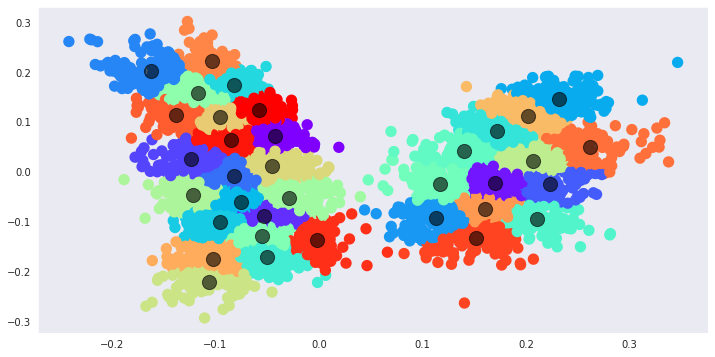

In [57]:
#Applying PCA for dimenstionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
y = pca.fit_transform(X_vc.toarray())
kmeans = KMeans(n_clusters=k_clusters, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(y)
y_pred = kmeans.predict(y)

plt.figure(figsize=(12, 6))
plt.scatter(y[:, 0], y[:, 1], c=y_pred, s=40, cmap='rainbow', linewidths=5)

centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=200, alpha=0.6);

In [58]:
#Predict the clusters and evaluate the silhouette score
score = silhouette_score(y, y_pred)
print("Silhouette score is {}".format(score))

Silhouette score is 0.34814341602115173


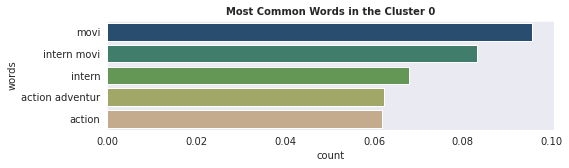

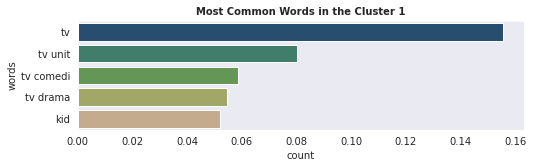

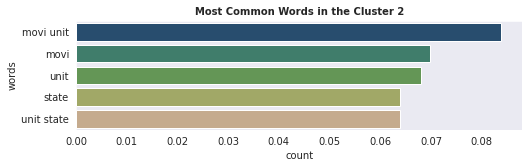

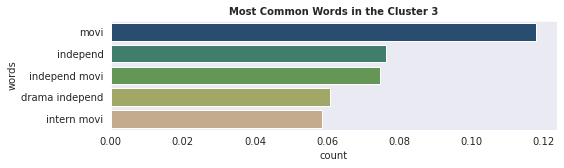

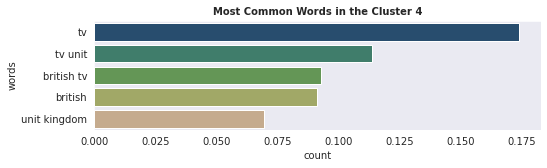

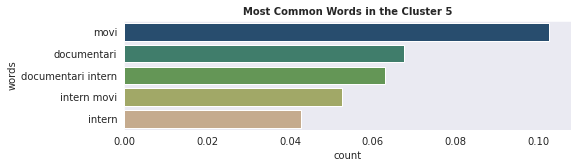

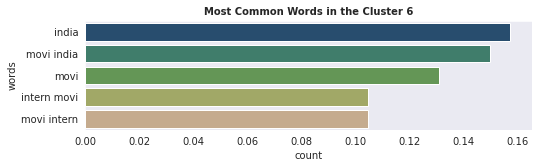

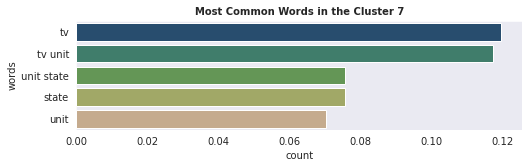

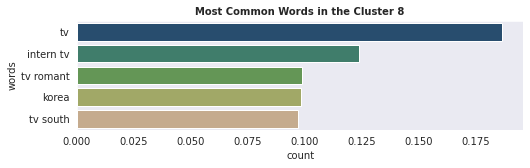

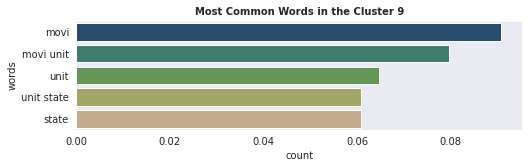

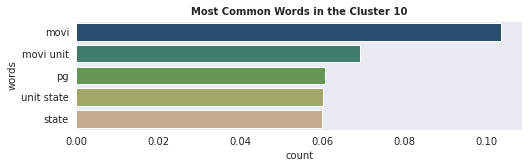

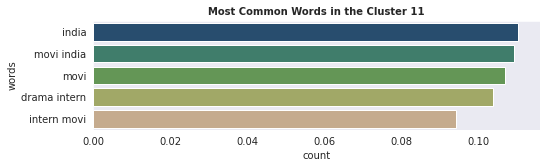

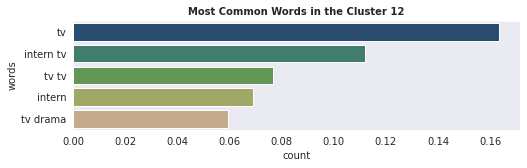

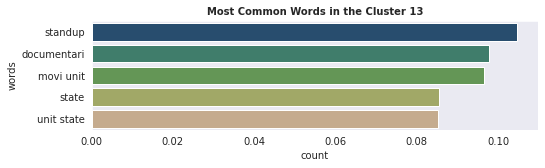

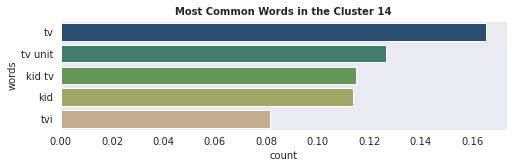

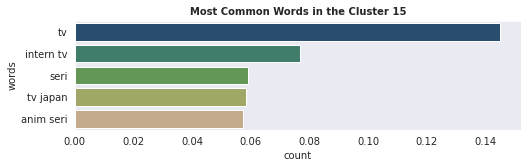

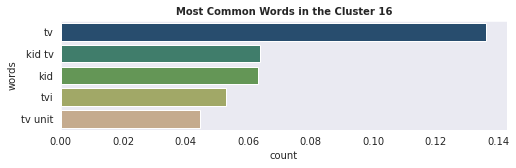

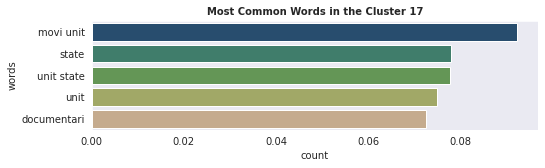

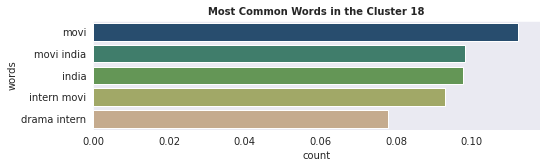

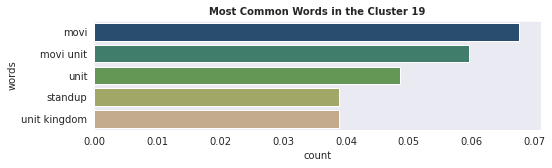

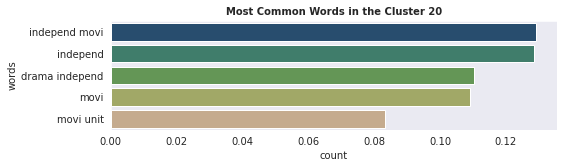

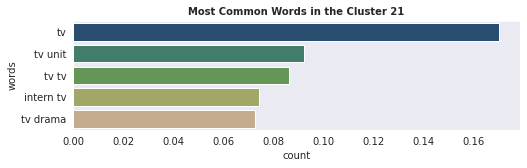

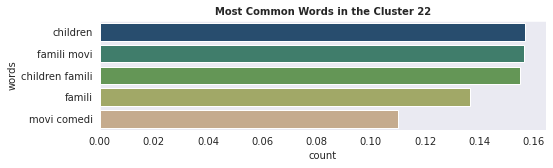

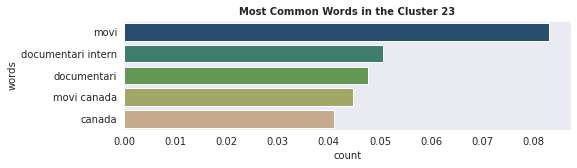

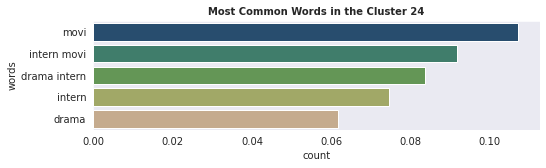

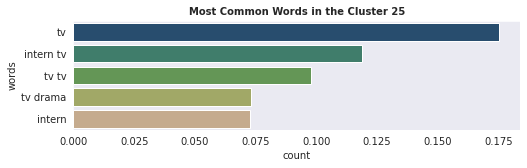

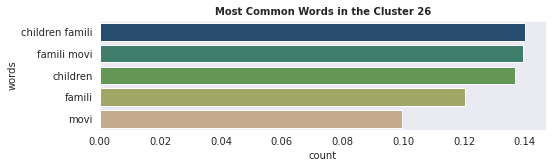

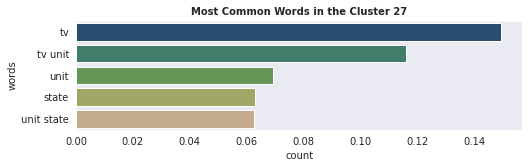

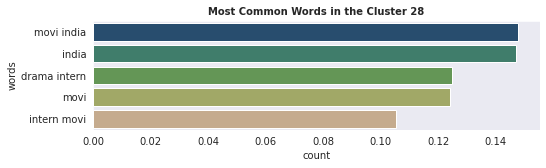

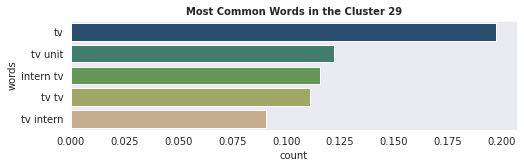

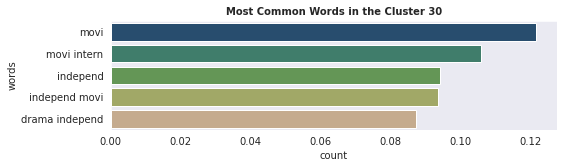

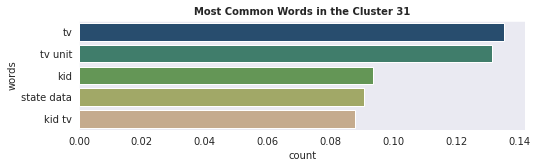

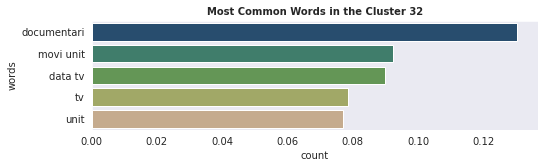

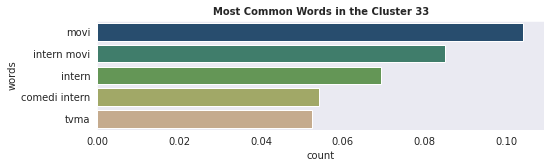

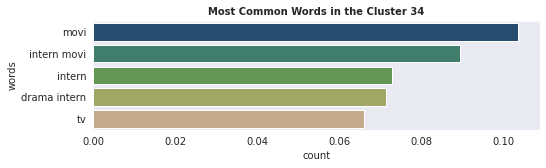

In [59]:
#Function for getting the most common words in each cluster
def get_common_words_cluster(vc_arr, y_pred, n_feats):
    labels = np.unique(y_pred)
    dfs = []
    for label in labels:
      # indices for each cluster
      id_temp = np.where(y_pred==label)
      # returns average score across cluster 
      x_means = np.mean(vc_arr[id_temp], axis = 0) 
      # indices with top 20 scores
      sorted_means = np.argsort(x_means)[::-1][:n_feats] 
      features = vectorizer.get_feature_names()
      common_words = [(features[i], x_means[i]) for i in sorted_means]
      df = pd.DataFrame(common_words, columns = ['words', 'count'])
      dfs.append(df)
    return dfs

#Function for data visualization of the most commin words in each cluster
def plot_common_words(dfs, num):
    for i in range(0, len(dfs)):
        plt.figure(figsize=(8, 2))
        plt.title(("Most Common Words in the Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'count' , y = 'words', orient = 'h' , data = dfs[i][:num],palette = 'gist_earth')

dfs = get_common_words_cluster(X_vc.toarray(), y_pred, 5)
plot_common_words(dfs, 5)

In [60]:
#to understand the difference between each clusters
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()
for i in range(k_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :k_clusters]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Cluster 0: action adventur action adventur movi adventur drama adventur comedi intern movi intern movi unit adventur intern unit india movi india drama drama intern unit state state comedi tvma tv pg movi japan comedi intern adventur anim cop featur intern forc terrorist man anim featur young agent japan kingdom featur
Cluster 1: docuseri tv tv unit data state data state unit state unit data tvma docuseri intern tvma seri tvpg data tvpg eplor stori documentari seri world docuseri realiti intern tv data tv cultur documentari histori realiti realiti tv intern chef tradit docuseri tv war food dive peopl india data
Cluster 2: movi spain spain movi intern movi tvma intern drama intern movi thriller thriller drama comedi comedi intern spain data spanish lui movi intern mario movi romant help secret comedi drama documentari intern romant movi daughter new life romant documentari woman home event group data independ son
Cluster 3: movi comedi famili movi children famili children famili movi co

In [61]:
df['cluster'] = kmeans.labels_
df.head(5)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,...,year_added,month_added,target_ages,date,Year,Month,Day,combined_text_feat,Cluster Label,cluster
0,s1,TV Show,3%,No Data,João Miguel,Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",...,2020,August,Adults,2020-08-14,2020,8,14,intern tv show tv drama tv scifi fantasi futur...,13,12
1,s2,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,2016,TV-MA,93 min,"Dramas, International Movies",...,2016,December,Adults,2016-12-23,2016,12,23,drama intern movi devast earthquak hit meico c...,34,33
2,s3,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,2011,R,78 min,"Horror Movies, International Movies",...,2018,December,Adults,2018-12-20,2018,12,20,horror movi intern movi armi recruit found dea...,15,33
3,s4,Movie,9,Shane Acker,Elijah Wood,United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",...,2017,November,Teens,2017-11-16,2017,11,16,action adventur independ movi scifi fantasi po...,20,10
4,s5,Movie,21,Robert Luketic,Jim Sturgess,United States,2008,PG-13,123 min,Dramas,...,2020,January,Teens,2020-01-01,2020,1,1,drama brilliant group student becom cardcount ...,22,2


In [62]:
#Function for getting the some of the same cluster item details
def find_same_cluster_items(name_nf):
  inp_nf = df.loc[df['title'].str.lower() == name_nf.lower()]
  num = inp_nf.cluster.iloc[0]
  type_nf = inp_nf.type.iloc[0]
  temp_df = df.loc[(df['cluster'] == num) & (df['type']==type_nf)]
  temp_df = temp_df.sample(10)
  print("The cluster number is {}".format(num))
   #print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))
  return list(temp_df['title'])

In [63]:
find_same_cluster_items('Dear Zindagi')

The cluster number is 28


['Vivah',
 'Paulettante Veedu',
 'Varane Avashyamund',
 'Ram Jaane',
 'Tanu Weds Manu',
 'Kacche Dhaagey',
 'Fakta Ladh Mhana',
 'Kappela',
 'Soldier',
 'Phir Se']

In [64]:
find_same_cluster_items('The Sky Is Pink')

The cluster number is 18


['Raat Akeli Hai',
 'Trimurti',
 'That Thing Called Tadhana',
 'Si Doel the Movie',
 'The Man Without Gravity',
 'No One Killed Jessica',
 'Vanjagar Ulagam',
 'The Apostate',
 'Company',
 'Mubarakan']

In [65]:
df[df['cluster'] ==33][['type','title','director','cast','country','rating','listed_in','description']]

,type,title,director,cast,country,rating,listed_in,description
1,Movie,7:19,Jorge Michel Grau,Demián Bichir,Mexico,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,Tedd Chan,Singapore,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
39,Movie,"¡Ay, mi madre!",Frank Ariza,Estefanía de los Santos,Spain,TV-MA,"Comedies, International Movies","When her estranged mother suddenly dies, a wom..."
42,Movie,Çok Filim Hareketler Bunlar,Ozan Açıktan,Ayça Erturan,Turkey,TV-MA,"Comedies, International Movies",Vignettes of the summer holidays follow vacati...
68,Movie,14 Blades,Daniel Lee,Donnie Yen,Hong Kong,R,"Action & Adventure, International Movies","In the age of the Ming Dynasty, Quinglong is t..."
...,...,...,...,...,...,...,...,...
7649,Movie,Wives on Strike: The Revolution,Omoni Oboli,Uche Jumbo,United Kingdom,TV-PG,"Comedies, Dramas, International Movies","After a woman is severely beaten at home, her ..."
7708,Movie,Yes or No 2.5,Kirati Nakintanon,Supanart Jittaleela,Thailand,TV-PG,"International Movies, LGBTQ Movies, Romantic M...",Roommates Wine and Pie find their lives turned...
7737,Movie,Young Tiger,Mu Chu,Qiu Yuen,Hong Kong,NR,"Action & Adventure, International Movies","Aided only by a tough female police officer, a..."
7770,Movie,Zinzana,Majid Al Ansari,Ali Suliman,United Arab Emirates,TV-MA,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...


**RECOMMENDATION**